In [1]:
!pip install pandas 
!pip install numpy 
!pip install matplotlib seaborn
!pip install scikit-learn
!pip install tensorflow
!pip install tqdm wordcloud

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [3]:
path=r'C:\Users\mssan\OneDrive\Desktop\course_data\coursera_data.csv'
df=pd.read_csv(path)
df.dtypes

Unnamed: 0                    int64
course_title                 object
course_organization          object
course_Certificate_type      object
course_rating               float64
course_difficulty            object
course_students_enrolled     object
dtype: object

In [4]:
def enrollment_fix(value):
    value=str(value).strip().lower()
    if 'k' in value:
        value= value.replace('k','')
        return (float(value)*1000)
    elif 'm' in value:
        value= value.replace('m','')
        return (float(value)*1000000)
    else:
        return float(value)


    

In [5]:
df['course_students_enrolled']=df['course_students_enrolled'].apply(enrollment_fix)

In [6]:
df.drop(columns=['Unnamed: 0'],inplace=True)


In [7]:
popularity=df[['course_students_enrolled','course_title']]
#popularity.drop(columns=popularity.loc['index'])
display(popularity.head(20).sort_values(by='course_students_enrolled',ascending=False).reset_index())

,index,course_students_enrolled,course_title
0,18,540000.0,Academic English: Writing
1,6,350000.0,AI For Everyone
2,4,320000.0,A Life of Happiness and Fulfillment
3,12,130000.0,AWS Fundamentals
4,2,130000.0,A Crash Course in Data Science
5,15,110000.0,AWS Fundamentals: Going Cloud-Native
6,3,91000.0,A Law Student's Toolkit
7,8,61000.0,AI Foundations for Everyone
8,5,39000.0,ADHD: Everyday Strategies for Elementary Students
9,14,27000.0,AWS Fundamentals: Building Serverless Applicat...


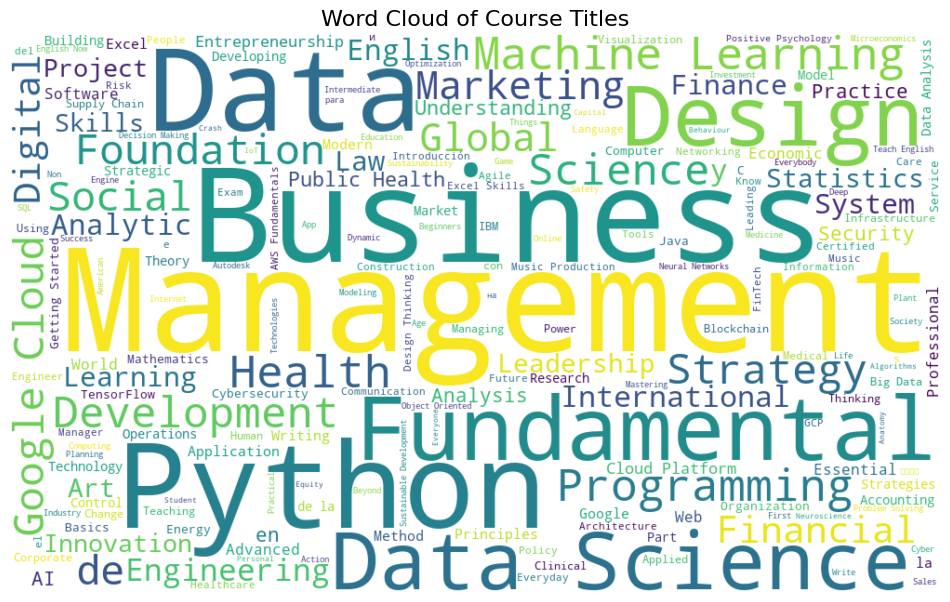

In [8]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Combine all course titles into one string
text = " ".join(title for title in df['course_title'])

# Define stopwords (common words to exclude)
stopwords = set(STOPWORDS)
stopwords.update(["course", "introduction", "learn", "basic"])  # optional custom removals

# Generate word cloud
wordcloud = WordCloud(width=1000, height=600,
                      background_color="white",
                      stopwords=stopwords,
                      colormap="viridis").generate(text)

# Plot
plt.figure(figsize=(12,8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Course Titles", fontsize=16)
plt.show()


In [9]:
encoded_df=pd.get_dummies(df,columns=['course_organization', 
                                     'course_Certificate_type', 
                                     'course_difficulty'])


In [10]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
encoded_df[['course_rating', 'course_students_enrolled']] = scaler.fit_transform(
    encoded_df[['course_rating', 'course_students_enrolled']]
)

In [11]:
print(encoded_df['course_rating'].head())
print(encoded_df['course_rating'].dtype)
print(encoded_df['course_rating'].min(),encoded_df['course_rating'].max())

0    0.823529
1    0.823529
2    0.705882
3    0.823529
4    0.882353
Name: course_rating, dtype: float64
float64
0.0 0.9999999999999998


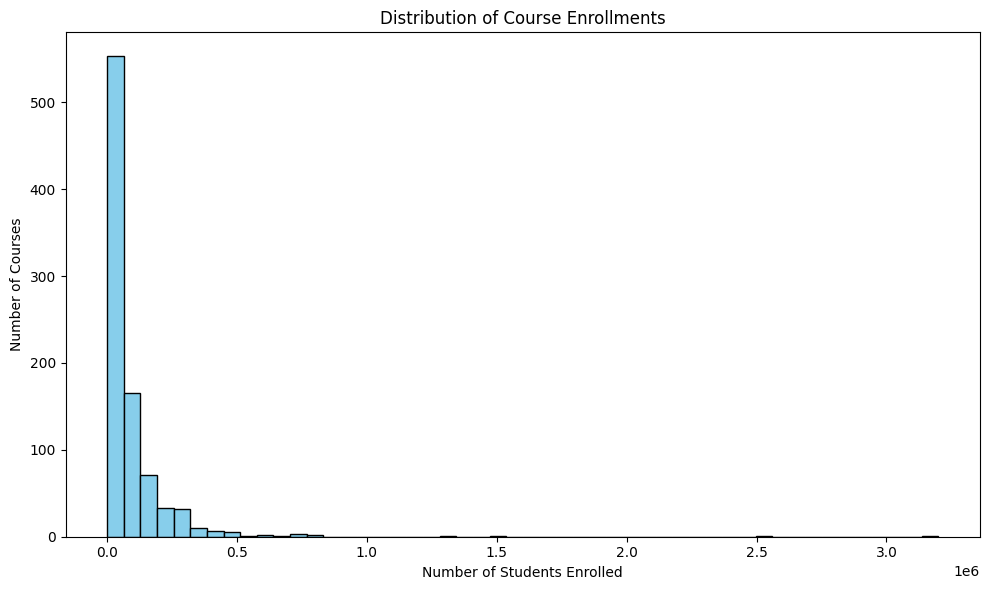

In [12]:
import matplotlib.pyplot as plt

# Plot histogram of student enrollments 
plt.figure(figsize=(10,6))
plt.hist(df['course_students_enrolled'], bins=50, edgecolor='black', color='skyblue')

plt.title("Distribution of Course Enrollments")
plt.xlabel("Number of Students Enrolled")
plt.ylabel("Number of Courses")
plt.tight_layout()
plt.show()

In [13]:
encoded_df

,course_title,course_rating,course_students_enrolled,course_organization_(ISC)²,course_organization_Amazon Web Services,course_organization_American Institute of Business and Economics,course_organization_American Museum of Natural History,course_organization_Arizona State University,course_organization_Atlassian,course_organization_Autodesk,...,course_organization_École Polytechnique,course_organization_École Polytechnique Fédérale de Lausanne,course_organization_École des Ponts ParisTech,course_Certificate_type_COURSE,course_Certificate_type_PROFESSIONAL CERTIFICATE,course_Certificate_type_SPECIALIZATION,course_difficulty_Advanced,course_difficulty_Beginner,course_difficulty_Intermediate,course_difficulty_Mixed
0,(ISC)² Systems Security Certified Practitioner...,0.823529,0.001188,True,False,False,False,False,False,False,...,False,False,False,False,False,True,False,True,False,False
1,A Crash Course in Causality: Inferring Causal...,0.823529,0.004846,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,True,False
2,A Crash Course in Data Science,0.705882,0.040175,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,True
3,A Law Student's Toolkit,0.823529,0.027982,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,True
4,A Life of Happiness and Fulfillment,0.882353,0.099578,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,Программирование на Python,0.705882,0.015789,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,True,False
887,Психолингвистика (Psycholinguistics),0.882353,0.006097,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,True
888,Разработка интерфейсов: вёрстка и JavaScript,0.705882,0.008910,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,True,False
889,Русский как иностранный,0.764706,0.002595,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,True,False


In [14]:
feature_df=encoded_df.drop(columns=['course_title'])

In [15]:
# Convert only boolean columns to int (0/1)
feature_df = feature_df.astype({col: int for col in feature_df.select_dtypes(include='bool').columns})


In [16]:
feature_df

,course_rating,course_students_enrolled,course_organization_(ISC)²,course_organization_Amazon Web Services,course_organization_American Institute of Business and Economics,course_organization_American Museum of Natural History,course_organization_Arizona State University,course_organization_Atlassian,course_organization_Autodesk,course_organization_Automation Anywhere,...,course_organization_École Polytechnique,course_organization_École Polytechnique Fédérale de Lausanne,course_organization_École des Ponts ParisTech,course_Certificate_type_COURSE,course_Certificate_type_PROFESSIONAL CERTIFICATE,course_Certificate_type_SPECIALIZATION,course_difficulty_Advanced,course_difficulty_Beginner,course_difficulty_Intermediate,course_difficulty_Mixed
0,0.823529,0.001188,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1,0.823529,0.004846,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0.705882,0.040175,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
3,0.823529,0.027982,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4,0.882353,0.099578,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0.705882,0.015789,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
887,0.882353,0.006097,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
888,0.705882,0.008910,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
889,0.764706,0.002595,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0


In [17]:
subject_keywords = {
    # -----------------------
    # DATA, AI & ANALYTICS
    # -----------------------
    "data": "Data Science",
    "machine learning": "Data Science",
    "deep learning": "Data Science",
    "ai": "Data Science",
    "artificial intelligence": "Data Science",
    "analytics": "Data Science",
    "big data": "Data Science",
    "statistics": "Mathematics",
    "probability": "Mathematics",
    
    # -----------------------
    # PROGRAMMING & IT
    # -----------------------
    "python": "Programming",
    "java": "Programming",
    "c++": "Programming",
    "c#": "Programming",
    "javascript": "Programming",
    "sql": "Programming",
    "r programming": "Programming",
    "html": "Programming",
    "css": "Programming",
    "docker": "DevOps",
    "kubernetes": "DevOps",
    "linux": "IT",
    "operating system": "IT",
    "cloud": "Cloud Computing",
    "aws": "Cloud Computing",
    "azure": "Cloud Computing",
    "gcp": "Cloud Computing",
    "cyber": "Cybersecurity",
    "security": "Cybersecurity",
    "hacking": "Cybersecurity",
    "network": "Networking",
    "iot": "IoT",
    "blockchain": "Blockchain",
    
    # -----------------------
    # BUSINESS & FINANCE
    # -----------------------
    "business": "Business",
    "entrepreneur": "Business",
    "startup": "Business",
    "marketing": "Marketing",
    "digital marketing": "Marketing",
    "seo": "Marketing",
    "finance": "Finance",
    "accounting": "Finance",
    "investment": "Finance",
    "trading": "Finance",
    "stock": "Finance",
    "economics": "Economics",
    "management": "Management",
    "strategy": "Management",
    "leadership": "Management",
    "project management": "Management",
    "supply chain": "Management",
    "hr": "Human Resources",
    
    # -----------------------
    # LANGUAGES
    # -----------------------
    "english": "Language",
    "french": "Language",
    "spanish": "Language",
    "german": "Language",
    "russian": "Language",
    "chinese": "Language",
    "korean": "Language",
    "japanese": "Language",
    "italian": "Language",
    
    # -----------------------
    # SCIENCE & ENGINEERING
    # -----------------------
    "biology": "Biology",
    "genetics": "Biology",
    "neuroscience": "Biology",
    "chemistry": "Chemistry",
    "physics": "Physics",
    "quantum": "Physics",
    "astronomy": "Astronomy",
    "astrophysics": "Astronomy",
    "mathematics": "Mathematics",
    "algebra": "Mathematics",
    "geometry": "Mathematics",
    "calculus": "Mathematics",
    "engineering": "Engineering",
    "electrical": "Engineering",
    "mechanical": "Engineering",
    "civil": "Engineering",
    
    # -----------------------
    # SOCIAL SCIENCES
    # -----------------------
    "psychology": "Psychology",
    "sociology": "Social Science",
    "politics": "Political Science",
    "political": "Political Science",
    "law": "Law",
    "legal": "Law",
    "philosophy": "Philosophy",
    "ethics": "Philosophy",
    "history": "History",
    
    # -----------------------
    # ARTS & CREATIVE
    # -----------------------
    "art": "Arts",
    "design": "Design",
    "graphic": "Design",
    "ux": "Design",
    "ui": "Design",
    "music": "Music",
    "film": "Film",
    "photography": "Photography",
    
    # -----------------------
    # HEALTH & MEDICINE
    # -----------------------
    "health": "Health",
    "medicine": "Medicine",
    "nursing": "Medicine",
    "anatomy": "Medicine",
    "nutrition": "Health",
    "mental": "Health",
    "covid": "Health",
    "epidemiology": "Medicine",
    
    # -----------------------
    # OTHER
    # -----------------------
    "education": "Education",
    "teaching": "Education",
    "training": "Education",
    "religion": "Religion",
    "spiritual": "Religion"
}


In [18]:
import re

def find_subjects(title):
    title_lower = title.lower()
    matched = []
    for keyword, subject in subject_keywords.items():
        if re.search(rf"\b{keyword}\b", title_lower):
            matched.append(subject)
    return list(set(matched)) if matched else ["General"]




In [19]:
import re
import string
import nltk
from nltk.stem import WordNetLemmatizer

# Make sure you have the necessary resources
nltk.download('punkt')
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()

def preprocess_title(title):
    # 1. Lowercase
    title = title.lower()
    
    # 2. Remove special characters & punctuation (keep letters, numbers, and spaces)
    title = re.sub(r'[^a-z0-9\s]', '', title)
    
    # 3. Tokenize
    tokens = nltk.word_tokenize(title)
    
    # 4. Lemmatize each token
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    
    # 5. Rejoin into a clean string
    return " ".join(tokens)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mssan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\mssan\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [20]:
df['course_subjects'] = df['course_title'].apply(find_subjects)

In [21]:
df['course_subjects'].head()

0    [Cybersecurity]
1     [Data Science]
2     [Data Science]
3              [Law]
4          [General]
Name: course_subjects, dtype: object

In [22]:
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer()
subject_encoded = mlb.fit_transform(df['course_subjects'])

# Convert to DataFrame
subject_df = pd.DataFrame(subject_encoded, columns=mlb.classes_, index=df.index)

In [23]:
df['course_title']

0      (ISC)² Systems Security Certified Practitioner...
1      A Crash Course in Causality:  Inferring Causal...
2                         A Crash Course in Data Science
3                                A Law Student's Toolkit
4                    A Life of Happiness and Fulfillment
                             ...                        
886                           Программирование на Python
887                 Психолингвистика (Psycholinguistics)
888         Разработка интерфейсов: вёрстка и JavaScript
889                              Русский как иностранный
890        Финансовые инструменты для частного инвестора
Name: course_title, Length: 891, dtype: object

In [24]:
subject_df

,Arts,Biology,Blockchain,Business,Chemistry,Cloud Computing,Cybersecurity,Data Science,Design,DevOps,...,Marketing,Mathematics,Medicine,Music,Philosophy,Photography,Physics,Political Science,Programming,Psychology
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
887,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
888,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
889,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
feature_df = pd.concat([feature_df, subject_df], axis=1)

In [26]:
feature_df.shape

(891, 197)

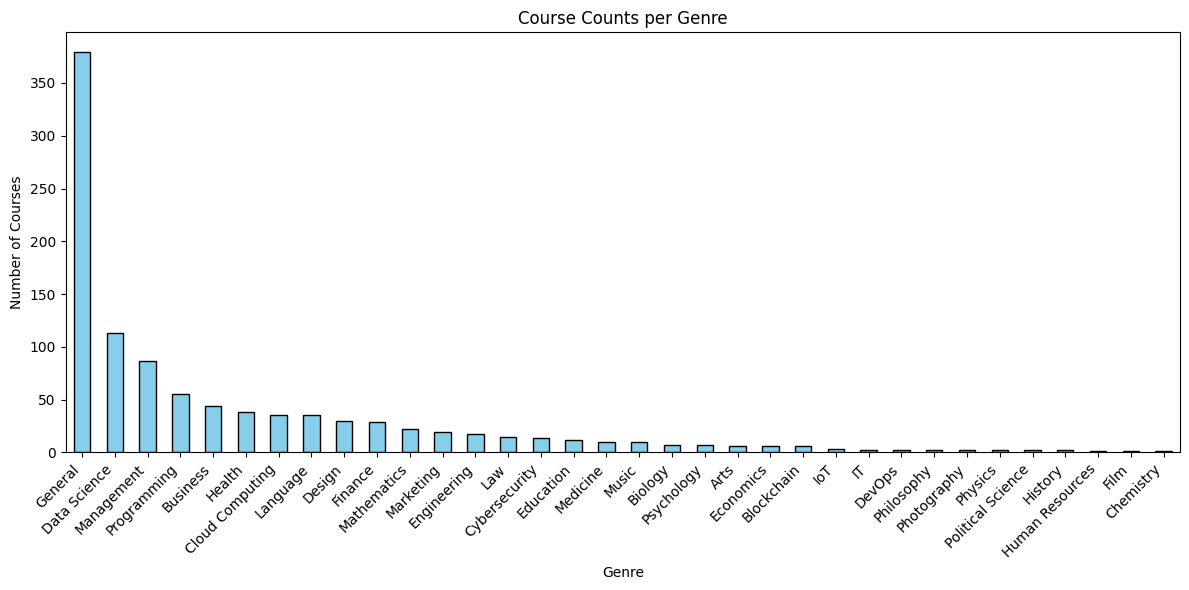

In [27]:
import matplotlib.pyplot as plt

# Sum each genre column to get total courses per genre
genre_counts = subject_df.sum().sort_values(ascending=False)

# Plot bar chart
plt.figure(figsize=(12,6))
genre_counts.plot(kind='bar', edgecolor='black', color='skyblue')

plt.title("Course Counts per Genre")
plt.xlabel("Genre")
plt.ylabel("Number of Courses")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [46]:
subject_cols = subject_df.columns


# Drop duplicate course titles and reset index
df = df.drop_duplicates(subset='course_title').reset_index(drop=True)
feature_df = feature_df.reset_index(drop=True)

# Rebuild weighted_features
weighted_features = feature_df.select_dtypes(include=['number']).copy()

# Match lengths (use slicing or align)
weighted_features = weighted_features.iloc[:len(df)]
weighted_features.index = df['course_title']
weighted_features[subject_cols] *= 2  # give subjects higher priority
weighted_features = weighted_features.select_dtypes(include=['int', 'float']).copy()


In [47]:
from sklearn.metrics.pairwise import cosine_similarity

similarity_matrix=cosine_similarity(weighted_features)
sim_scores=pd.DataFrame(similarity_matrix,
                        index=df['course_title'],
                        columns=df['course_title'])

In [48]:
def content_recommendation(course_title,top_n):
    if course_title not in sim_scores.index:
        return (f"Course {course_title} not in the dataframe")
    similar_courses=sim_scores[course_title].sort_values(ascending=False)
    similar_courses=similar_courses.drop(course_title)
    top_courses=similar_courses.head(top_n)

    return top_courses
    
     

    

In [49]:
weighted_features.shape

(888, 197)

In [50]:
print(content_recommendation("A Law Student's Toolkit",7))

course_title
Roman Architecture                                                        0.870675
American Contract Law I                                                   0.870659
Introduction to Marketing                                                 0.870412
International Law in Action: the Arbitration of International Disputes    0.870389
Introduction to Financial Accounting                                      0.870388
International Leadership and Organizational Behavior                      0.870375
An Introduction to American Law                                           0.740989
Name: A Law Student's Toolkit, dtype: float64


In [51]:
np.random.seed(42)

df = df.drop_duplicates(subset=['course_title']).reset_index(drop=True)

num_users=88
user_ids=[f"User_{i+1}" for i in range(num_users)]

popularity_prob = df['course_students_enrolled'].astype(float).values
popularity_prob = popularity_prob / popularity_prob.sum()  # ensure exact sum=1
user_course_matrix=pd.DataFrame(0,index=user_ids,columns=df['course_title'])

for user in user_ids:
    chosen_courses = np.random.choice(df['course_title'], size=10, replace=False, p=popularity_prob)
    ratings = np.random.randint(3, 6, size=len(chosen_courses))  # ✅ Match sizes dynamically
    user_course_matrix.loc[user, chosen_courses] = ratings
    

In [52]:
weighted_features.head()

,course_rating,course_students_enrolled,course_organization_(ISC)²,course_organization_Amazon Web Services,course_organization_American Institute of Business and Economics,course_organization_American Museum of Natural History,course_organization_Arizona State University,course_organization_Atlassian,course_organization_Autodesk,course_organization_Automation Anywhere,...,Marketing,Mathematics,Medicine,Music,Philosophy,Photography,Physics,Political Science,Programming,Psychology
course_title,,,,,,,,,,,,,,,,,,,,,
(ISC)² Systems Security Certified Practitioner (SSCP),0.823529,0.001188,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A Crash Course in Causality: Inferring Causal Effects from Observational Data,0.823529,0.004846,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A Crash Course in Data Science,0.705882,0.040175,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A Law Student's Toolkit,0.823529,0.027982,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A Life of Happiness and Fulfillment,0.882353,0.099578,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [53]:


# Normalize enrollment and rating (if not already done)
weighted_features['course_students_enrolled'] = feature_df['course_students_enrolled'] / feature_df['course_students_enrolled'].max()
weighted_features['course_rating'] = feature_df['course_rating'] / 5.0

# Add subject columns again if you had them before
#feature_df = pd.concat([feature_df, subject_df], axis=1)

# 4. Create weighted_features
subject_cols = [col for col in weighted_features.columns if col in subject_df.columns]

for col in subject_cols:
    if col in weighted_features.columns:
        weighted_features[col] = weighted_features[col] * 2

# 5. Finally, set index to course_title (now lengths match!)

df = df.drop_duplicates(subset='course_title')
weighted_features = weighted_features.iloc[:len(df)]  # align if needed
weighted_features = weighted_features.set_index(df['course_title'])




In [62]:
weighted_features = feature_df.select_dtypes(include=['number']).copy()
min_len = min(len(weighted_features), len(df))
weighted_features = weighted_features.iloc[:min_len]

weighted_features.index = df['course_title'][:min_len]
user_profile_matrix = pd.DataFrame(index=user_ids, columns=weighted_features.columns, dtype=float)

for user in user_ids:
    rated_courses = user_course_matrix.loc[user]
    rated_courses = rated_courses[rated_courses > 0]

    if len(rated_courses) > 0:
        # Weighted average of course feature vectors by rating
        weighted_vectors = weighted_features.loc[rated_courses.index].multiply(rated_courses.values, axis=0)
        user_profile_matrix.loc[user] = weighted_vectors.mean()
    else:
        user_profile_matrix.loc[user] = 0


In [63]:
user_profile_matrix.head()

,course_rating,course_students_enrolled,course_organization_(ISC)²,course_organization_Amazon Web Services,course_organization_American Institute of Business and Economics,course_organization_American Museum of Natural History,course_organization_Arizona State University,course_organization_Atlassian,course_organization_Autodesk,course_organization_Automation Anywhere,...,Marketing,Mathematics,Medicine,Music,Philosophy,Photography,Physics,Political Science,Programming,Psychology
User_1,3.088235,0.195091,0.0,0.0,0.0,0.0,0.4,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.3,0.0
User_2,3.264706,0.449664,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4,0.0
User_3,3.400000,0.109489,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
User_4,2.682353,0.057374,0.0,0.0,0.0,0.4,0.0,0.0,0.0,0.0,...,0.0,0.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
User_5,3.123529,0.084618,0.0,0.8,0.0,0.3,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.3,0.0


In [64]:
from sklearn.metrics.pairwise import cosine_similarity

user_similarity = cosine_similarity(user_profile_matrix.fillna(0))
user_similarity_df = pd.DataFrame(user_similarity,
                                  index=user_profile_matrix.index,
                                  columns=user_profile_matrix.index)


In [65]:
def user_based_recommendations(user_id, top_n=5):
    if user_id not in user_similarity_df.index:
        return f"{user_id} not found."
    
    # 1. Find most similar users
    similar_users = user_similarity_df[user_id].sort_values(ascending=False).drop(user_id)
    top_users = similar_users.head(5).index
    
    # 2. Aggregate courses from similar users
    neighbor_courses = user_course_matrix.loc[top_users]
    avg_ratings = neighbor_courses.mean().sort_values(ascending=False)
    
    # 3. Exclude courses the target user already took
    already_taken = user_course_matrix.loc[user_id]
    avg_ratings = avg_ratings[already_taken == 0]
    
    return avg_ratings.head(top_n)


In [66]:
user='User_6'

In [67]:
recommendations=(user_based_recommendations(user,10))
print(recommendations)

course_title
Quantitative Methods                                                              1.4
Introducción a la programación en Python I: Aprendiendo a programar con Python    1.0
Write Professional Emails in English                                              1.0
Data Visualization with Tableau                                                   1.0
Introduction to Personal Branding                                                 1.0
Python and Statistics for Financial Analysis                                      1.0
Successful Negotiation: Essential Strategies and Skills                           1.0
Financing and Investing in Infrastructure                                         1.0
Applied Plotting, Charting & Data Representation in Python                        0.8
Functional Programming in Scala                                                   0.8
dtype: float64


In [68]:
import numpy as np
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt

# --- SAFE fallback evaluation block ---
new_recommendations_per_user = []
all_recs = []

for user, recs in recommendations.items():
    # Only proceed if user exists in user_course_matrix
    if user in user_course_matrix.index:
        seen_courses = user_course_matrix.loc[user]
        seen_courses = seen_courses[seen_courses > 0].index
        
        # If columns don’t match, skip gracefully
        valid_recs = [c for c in recs if c in user_course_matrix.columns]
        new_courses = [c for c in valid_recs if c not in seen_courses]
        
        new_recommendations_per_user.append(len(new_courses))
        all_recs.extend(valid_recs)

# --- Compute safe average ---
if len(new_recommendations_per_user) > 0:
    avg_new_recs = np.mean(new_recommendations_per_user)
else:
    avg_new_recs = 0.0

print(f"✅ Average new (unseen) courses per user: {avg_new_recs:.2f}")

# --- Top-10 most frequently recommended courses ---
if len(all_recs) > 0:
    top10 = Counter(all_recs).most_common(10)
    top10_df = pd.DataFrame(top10, columns=['course_title', 'frequency'])
    
    plt.figure(figsize=(10,5))
    plt.barh(top10_df['course_title'], top10_df['frequency'])
    plt.gca().invert_yaxis()
    plt.title("Top-10 Most Frequently Recommended Courses")
    plt.xlabel("Number of Users Recommended To")
    plt.tight_layout()
    plt.show()
else:
    print("⚠️ No valid recommendations found to plot.")


✅ Average new (unseen) courses per user: 0.00
⚠️ No valid recommendations found to plot.


In [69]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


In [145]:
# Ensure no 'clusters' column is present when fitting
features = user_course_matrix.drop(columns='clusters', errors='ignore')

# Refit cleanly
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(features.fillna(0))

# Add the cluster labels back afterward
user_course_matrix['clusters'] = clusters


In [130]:
pca=PCA(n_components=2)

reduced=pca.fit_transform(user_profile_matrix.drop(columns='clusters'))

components=pd.DataFrame(pca.components_,
                        columns=user_profile_matrix.drop(columns='clusters').columns,
                        index=['PCA1','PCA2'])


print(components.T.sort_values(by='PCA1',ascending=False).head(10))
print(components.T.sort_values(by='PCA2',ascending=False).head(10))

                                                        PCA1      PCA2
course_Certificate_type_COURSE                      0.675601  0.125029
course_difficulty_Mixed                             0.134533 -0.304480
General                                             0.102251  0.216817
course_organization_American Museum of Natural ...  0.078377 -0.015876
course_organization_Eindhoven University of Tec...  0.061078 -0.075486
course_organization_University of California Sa...  0.054076  0.027324
course_rating                                       0.045009  0.087011
Law                                                 0.039345  0.007107
course_organization_University of Virginia          0.036871  0.086976
course_organization_Saint Petersburg State Univ...  0.035982 -0.014006
                                                        PCA1      PCA2
course_difficulty_Beginner                         -0.147152  0.779314
General                                             0.102251  0.216817
course

In [131]:
components

,course_rating,course_students_enrolled,course_organization_(ISC)²,course_organization_Amazon Web Services,course_organization_American Institute of Business and Economics,course_organization_American Museum of Natural History,course_organization_Arizona State University,course_organization_Atlassian,course_organization_Autodesk,course_organization_Automation Anywhere,...,Marketing,Mathematics,Medicine,Music,Philosophy,Photography,Physics,Political Science,Programming,Psychology
PCA1,0.045009,-0.042589,2.787290e-17,-0.005333,2.233668e-18,0.078377,0.014178,-0.007366,2.938623e-17,0.002320,...,0.013013,0.000470,-0.013841,0.028516,0.0,0.006238,-0.002473,0.0,-0.020472,-0.014129
PCA2,0.087011,-0.011503,3.441893e-17,0.008100,3.305361e-17,-0.015876,-0.018897,0.005392,-7.522810e-17,0.005521,...,0.021260,-0.028206,-0.000923,0.011906,-0.0,0.000869,-0.004806,-0.0,-0.055124,0.004371


In [132]:
def create_pca_plot(df,feature_names=None,color=None,clusters=None,title='PCA or feature selction'):
    X = df[feature_names] if feature_names else df.copy()
    reduced=pca.fit_transform(X)
    explained_var = pca.explained_variance_ratio_
    components=pd.DataFrame(pca.components_,
                        columns=X.columns,
                        index=['PCA1','PCA2'])
    top_pca1=components.loc['PCA1'].abs().sort_values(ascending=False)
    top_pca2=components.loc['PCA2'].abs().sort_values(ascending=False)

    pca_x=top_pca1.index[0]
    pca_y=top_pca2.index[0]

    if top_pca1.iloc[0] >= 0.9 and top_pca2.iloc[0] >=0.9:
        plt.scatter(X[pca_x],X[pca_y],c=clusters,cmap='tab10')
        plt.xlabel(pca_x)
        plt.ylabel(pca_y)
        plt.title(f"{title}: {pca_x} vs {pca_y}")
        plt.show()
        print(f"Variance component 1 {pca_x} with {top_pca1.iloc[0]} variance\nVariance component 2 {pca_y} with {top_pca2.iloc[0]} variance")

    else:
        plt.scatter(X.iloc[:,0],X.iloc[:,1],c=clusters,cmap='tab10')
        plt.xlabel('PCA1')
        plt.ylabel('PCA2')
        plt.title('PCA projections')
        plt.show()
        

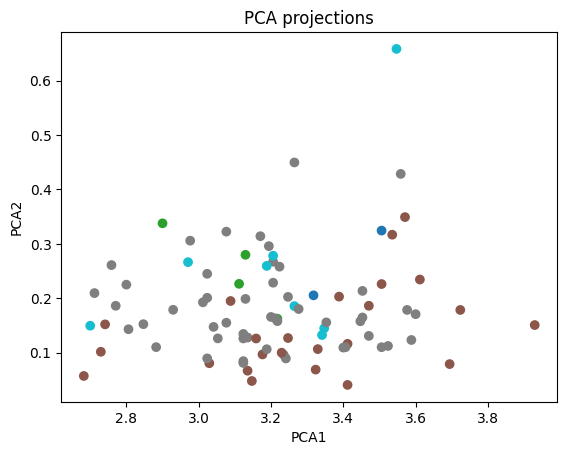

In [133]:
create_pca_plot(
    user_profile_matrix.drop(columns='clusters'),
    title="User Profiles PCA/Feature Plot",
    clusters=user_profile_matrix['clusters'] if 'clusters' in user_profile_matrix.columns else None
)

In [146]:
def recommend_courses_kmeans(user_id, user_course_matrix, kmeans_model, top_n=10):
    # Ensure we don't include the 'clusters' column
    features = user_course_matrix.drop(columns='clusters', errors='ignore')
    
    # Extract the user's feature vector
    user_vector = features.loc[user_id].values.reshape(1, -1)
    
    # Predict cluster
    user_cluster = kmeans_model.predict(user_vector)[0]
    
    # Get users in same cluster
    same_cluster_users = user_course_matrix[user_course_matrix['clusters'] == user_cluster]
    
    # Compute average ratings per course (excluding cluster column)
    cluster_mean = same_cluster_users.drop(columns='clusters', errors='ignore').mean()
    
    # Return top N recommendations
    return cluster_mean.sort_values(ascending=False).head(top_n)


In [147]:
recom = recommend_courses_kmeans('User_5', user_course_matrix,kmeans)
print(recom)

course_title
The Science of Well-Being                                  1.40
Data Science                                               0.62
Business Foundations                                       0.60
Étudier en France: French Intermediate course B1-B2        0.60
Career Success                                             0.56
Python for Everybody                                       0.50
Successful Negotiation: Essential Strategies and Skills    0.50
Excel to MySQL: Analytic Techniques for Business           0.48
The Singer Songwriter                                      0.44
English for Career Development                             0.36
dtype: float64


C:\Users\mssan\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


In [83]:
from sklearn.neighbors import NearestNeighbors


In [84]:
def knn_classifier(user_label, k=5):
    knn_model = NearestNeighbors(metric='cosine', algorithm='brute')
    knn_model.fit(user_course_matrix)

    # Get user vector
    user_vector = user_course_matrix.loc[user_label].values.reshape(1, -1)

    # Get neighbors (positions)
    distances, indices = knn_model.kneighbors(user_vector, n_neighbors=k+1)
    neighbor_pos = indices.flatten()[1:]  # skip self

    # Map neighbor positions → labels
    neighbor_labels = user_course_matrix.index[neighbor_pos]

    # Use .loc to select neighbors by label
    neighbor_ratings = user_course_matrix.loc[neighbor_labels]
   

    # Average neighbors' ratings
    preds = neighbor_ratings.mean(axis=0).values
    if isinstance(preds, tuple):
        preds = preds[0]
    preds = np.array(preds).flatten()
    return preds , knn_model

In [85]:
user_id='User_5'
neighbors=5

knn_classifier(user_id,)

C:\Users\mssan\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


(array([0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
        0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
        0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
        0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
        0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
        0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
        0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.6, 0. , 0. , 0. , 0. ,
        0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
        0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 2. , 0. , 0. , 0. ,
        0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.6,
        0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
        0. , 0.8, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
        0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
        0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. 

In [86]:
# Look at the chosen user's ratings
recommendations, model = knn_classifier(user_id, )
print("User's top rated courses:")
print(user_course_matrix.loc["User_5"].sort_values(ascending=False).head(10))

# Look at their neighbors and distances
distances, indices = model.kneighbors(user_course_matrix.loc["User_5"].values.reshape(1, -1), n_neighbors=10)
neighbor_ids = user_course_matrix.index[indices.flatten()][1:]  # drop self
print("\nChosen Neighbors:", neighbor_ids)
print("Distances:", distances.flatten()[1:])

User's top rated courses:
course_title
Primeros Auxilios Psicológicos (PAP)                  5
Responsive Website Development and Design             5
Fundamentos de Excel para Negocios                    5
AWS Fundamentals                                      4
Machine Learning                                      4
AWS Fundamentals: Building Serverless Applications    4
English for Career Development                        3
The Science of Well-Being                             3
Data Mining                                           3
Google IT Support                                     3
Name: User_5, dtype: int64

Chosen Neighbors: Index(['User_4', 'User_48', 'User_7', 'User_88', 'User_81', 'User_60',
       'User_69', 'User_49', 'User_78'],
      dtype='object')
Distances: [0.81147439 0.81534178 0.83117513 0.84611815 0.8490566  0.87689452
 0.88307092 0.88728056 0.88922175]


C:\Users\mssan\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
C:\Users\mssan\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


In [87]:
# Drop self from distances as well
neighbor_distances = distances.flatten()[1:]  

# Build a proper DataFrame
neighbor_df = pd.DataFrame({
    "Neighbor": neighbor_ids,
    "Distance": neighbor_distances,
    "Similarity": 1 - neighbor_distances  # optional, more intuitive
}).set_index("Neighbor")

print(neighbor_df)

          Distance  Similarity
Neighbor                      
User_4    0.811474    0.188526
User_48   0.815342    0.184658
User_7    0.831175    0.168825
User_88   0.846118    0.153882
User_81   0.849057    0.150943
User_60   0.876895    0.123105
User_69   0.883071    0.116929
User_49   0.887281    0.112719
User_78   0.889222    0.110778


In [88]:
def knn_predict_fn(user_label):
    """Return full KNN prediction vector (no top-k cutoff)."""
    knn_model = NearestNeighbors(metric='cosine', algorithm='brute')
    knn_model.fit(user_course_matrix)
    user_idx = list(user_course_matrix.index).index(user_label)
    user_vector = user_course_matrix.iloc[user_idx].values.reshape(1, -1)

    distances, indices = knn_model.kneighbors(user_vector, n_neighbors=6)  # 5 neighbors + self
    neighbor_pos = indices.flatten()[1:]  

    neighbor_ratings = user_course_matrix.iloc[neighbor_pos]
    preds = neighbor_ratings.mean(axis=0).values  # average rating per item

    return preds

In [89]:
from sklearn.decomposition import NMF


In [90]:
nmf=NMF(n_components=15,init='random',random_state=42)
user_factors=nmf.fit_transform(user_course_matrix)
item_factors=nmf.components_

nmf_pred=pd.DataFrame(user_factors @ item_factors,
                      index=user_course_matrix.index,
                      columns=user_course_matrix.columns)

def nmf_recommendations(user_id,top_n):
    pred=nmf_pred.loc[user_id]
    already_selected=user_course_matrix.loc[user_id]

    preds = pred.where(already_selected == 0, -np.inf)

    # Get top-n
    top_items = preds.nlargest(top_n).index

    return preds.loc[top_items].values
    

In [91]:
def nmf_pred_fn(user_id,top_n):

    return nmf_pred.loc[user_id].values

In [92]:
nmf_recommendations(user_id,neighbors)

array([1.84629835, 0.57211803, 0.55675727, 0.54638317, 0.54354737])

In [93]:
import pandas as pd

# nmf_pred is your reconstructed matrix (W × H)
# Convert it into a long-format dataset for easy analysis
nmf_recommendations_df = nmf_pred.reset_index().melt(
    id_vars='index',
    var_name='course_title',
    value_name='predicted_rating'
)

# Rename 'index' column to 'user_id'
nmf_recommendations_df.rename(columns={'index': 'user_id'}, inplace=True)

# OPTIONAL: Drop already-rated courses for each user
user_ratings_long = user_course_matrix.reset_index().melt(
    id_vars='index',
    var_name='course_title',
    value_name='actual_rating'
).rename(columns={'index': 'user_id'})

# Merge to know which predictions are for unrated courses
nmf_recommendations_df = nmf_recommendations_df.merge(
    user_ratings_long, on=['user_id', 'course_title'], how='left'
)

# Filter to only include courses the user hasn't rated yet
nmf_recommendations_df = nmf_recommendations_df[nmf_recommendations_df['actual_rating'] == 0]

# Sort for better usability
nmf_recommendations_df = nmf_recommendations_df.sort_values(
    ['user_id', 'predicted_rating'], ascending=[True, False]
)

nmf_recommendations_df.head(10)


,user_id,course_title,predicted_rating,actual_rating
65384,User_1,"Speak English Professionally: In Person, Onlin...",1.275910,0
2904,User_1,Agile Development,1.202564,0
74448,User_1,Using Databases with Python,0.784469,0
42768,User_1,Introduction to Data Science in Python,0.746325,0
37488,User_1,Improving Deep Neural Networks: Hyperparameter...,0.712914,0
30448,User_1,Fundamentals of Graphic Design,0.676911,0
52184,User_1,Mathematics for Machine Learning: Linear Algebra,0.669605,0
51656,User_1,Mastering Data Analysis in Excel,0.615181,0
43384,User_1,Introduction to Financial Accounting,0.576830,0
62304,User_1,SQL for Data Science,0.556381,0


In [94]:
print(nmf_recommendations_df.shape)

(77264, 4)


In [95]:
import tensorflow as tf
from tensorflow.keras import layers, regularizers, Model

In [96]:
n_users=user_course_matrix.shape[0]
n_items=user_course_matrix.shape[1]

user_input=layers.Input(shape=(1,))
item_input=layers.Input(shape=(1,))

user_emb=layers.Embedding(input_dim=n_users,
                          output_dim=32,
                          embeddings_regularizer=regularizers.l2(1e-3))(user_input)
item_emb=layers.Embedding(input_dim=n_items,
                          output_dim=32,
                          embeddings_regularizer=regularizers.l2(1e-3))(item_input)

user_vector=layers.Flatten()(user_emb)
item_vector=layers.Flatten()(item_emb)

concat=layers.Concatenate()([user_vector,item_vector])

x=layers.Dense(64,activation='relu',kernel_regularizer=regularizers.l2(1e-6))(concat)
x=layers.BatchNormalization()(x)
x=layers.Dropout(0.3)(x)

x=layers.Dense(32,activation='relu',kernel_regularizer=regularizers.l2(1e-6))(x)
x=layers.BatchNormalization()(x)
x=layers.Dropout(0.3)(x)

output=layers.Dense(1,activation='linear')(x)



nn_model=Model(inputs=[user_input,item_input],outputs=output)
nn_model.compile(optimizer='adam',loss='mse')
nn_model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)      │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ input_layer_1 (InputLayer)    │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ embedding (Embedding)         │ (None, 1, 32)             │           2,816 │ input_layer[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ embedding_1 (Embedding)       │ (None, 1, 32)             │          28,416 │ input_layer_1[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ flatten (Flatten)             │ (None, 32)                │               0 │ embedding[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ flatten_1 (Flatten)           │ (None, 32)                │               0 │ embedding_1[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ concatenate (Concatenate)     │ (None, 64)                │               0 │ flatten[0][0],             │
│                               │                           │                 │ flatten_1[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense (Dense)                 │ (None, 64)                │           4,160 │ concatenate[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ batch_normalization           │ (None, 64)                │             256 │ dense[0][0]                │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout (Dropout)             │ (None, 64)                │               0 │ batch_normalization[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_1 (Dense)               │ (None, 32)                │           2,080 │ dropout[0][0]              │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ batch_normalization_1         │ (None, 32)                │             128 │ dense_1[0][0]              │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout_1 (Dropout)           │ (None, 32)                │               0 │ batch_normalization_1[0][… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_2 (Dense)               │ (None, 1)                 │              33 │ dropout_1[0][0]            │
└───────────────────────────────┴───────────────────────────┴─────────────────┴────────────────────────────┘

 Total params: 37,889 (148.00 KB)

 Trainable params: 37,697 (147.25 KB)

 Non-trainable params: 192 (768.00 B)

In [97]:

train_data=[]
for user_idx,user in enumerate(user_course_matrix.index):
    for item_idx,rating in enumerate(user_course_matrix.loc[user]):
        
        if rating> 0:
            ratings_norm = (rating - 3.0) / 2.0
            train_data.append([user_idx,item_idx,ratings_norm])

train_data = np.array(train_data, dtype=np.float32).reshape(-1, 3)

X_train,X_test,y_train,y_test=train_test_split(train_data[:,:2],train_data[:,2],test_size=0.2,random_state=42)
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history=nn_model.fit([X_train[:,0],X_train[:,1]],
              y_train,
              epochs=20,
              batch_size=64,
              verbose=1,
              validation_split=0.1,
              callbacks=[early_stop]
                 )
              
              

Epoch 1/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 15s 64ms/step - loss: 3.3230 - val_loss: 0.4237
Epoch 2/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 2.2923 - val_loss: 0.3542
Epoch 3/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 2.0988 - val_loss: 0.3028
Epoch 4/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 1.4341 - val_loss: 0.2679
Epoch 5/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 1.2836 - val_loss: 0.2415
Epoch 6/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 1.1467 - val_loss: 0.2240
Epoch 7/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 1.1163 - val_loss: 0.2125
Epoch 8/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 1.0095 - val_loss: 0.2046
Epoch 9/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.9108 - val_loss: 0.1995
Epoch 10/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.8594 - val_loss: 0.1964
Epoch 11/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.8031 - val_loss: 0.1936
Epoch 12/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.

In [98]:
print("Train data shape:", train_data.shape)
print("Ratings min/max:", train_data[:,2].min(), train_data[:,2].max())

Train data shape: (880, 3)
Ratings min/max: 0.0 1.0


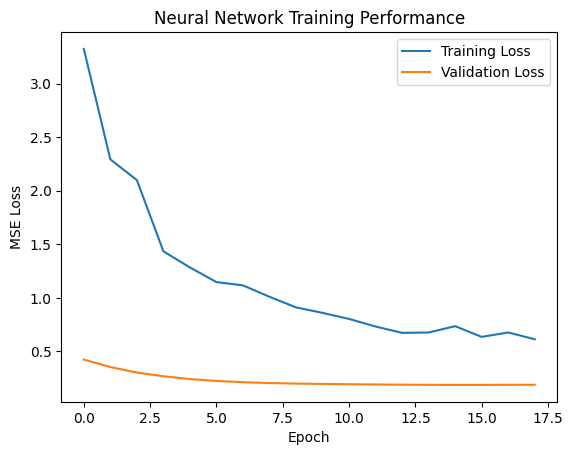

In [99]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.legend()
plt.title("Neural Network Training Performance")
plt.show()

In [100]:

def nn_recommend(user_idx, top_n=5):
    n_items = user_course_matrix.shape[1]
    user_array = np.full(n_items, user_idx)
    
    predictions = nn_model.predict([user_array, np.arange(n_items)], verbose=0).flatten()
    predictions=(predictions*2)+3
    predictions=np.clip(predictions,1,5)

   
    # Mask already rated items
    rated_mask = user_course_matrix.iloc[user_idx].values > 0
    predictions[rated_mask] = -np.inf  # exclude courses already rated

    top_items = predictions.argsort()[-top_n:][::-1]

  
    return user_course_matrix.columns[top_items], predictions[top_items]

# Example: Recommend for User_5 (convert name to index)
user_idx = list(user_course_matrix.index).index(user_id)
recommended_courses, predicted_scores = nn_recommend(user_idx, top_n=20)

for course, score in zip(recommended_courses, predicted_scores):
    print(f"{course} -> Predicted rating: {score:.2f}")

Agile with Atlassian Jira -> Predicted rating: 4.08
IBM Data Science -> Predicted rating: 4.08
Drug Discovery -> Predicted rating: 4.06
Cameras, Exposure, and Photography -> Predicted rating: 4.05
Learn SQL Basics for Data Science -> Predicted rating: 4.05
Initiating and Planning Projects -> Predicted rating: 4.04
A Life of Happiness and Fulfillment -> Predicted rating: 4.04
AI For Everyone -> Predicted rating: 4.04
R Programming -> Predicted rating: 4.04
Teaching Character and Creating Positive Classrooms -> Predicted rating: 4.04
Mastering Software Development in R -> Predicted rating: 4.03
Machine Learning with Python -> Predicted rating: 4.03
Structuring Machine Learning Projects -> Predicted rating: 4.03
Trading Strategies in Emerging Markets -> Predicted rating: 4.03
Design and Make Infographics (Project-Centered Course) -> Predicted rating: 4.03
Programming Foundations with JavaScript, HTML and CSS -> Predicted rating: 4.03
System Administration and IT Infrastructure Services ->

In [101]:
from sklearn.metrics import mean_absolute_error
def evaluate_model(nn_model, X_test, y_test):
    y_pred_norm = nn_model.predict([X_test[:,0], X_test[:,1]], verbose=0).flatten()
    y_pred = (y_pred_norm * 2) + 3
    y_pred = np.clip(y_pred, 1, 5)
    y_test = (y_test * 2) + 3   
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)

    print(f"MSE: {mse:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"MAE: {mae:.4f}")
    return mse, rmse, mae
evaluate_model(nn_model,X_test,y_test)

MSE: 0.6073
RMSE: 0.7793
MAE: 0.6241


(0.6072742938995361, np.float64(0.7792780594239364), 0.6240589618682861)

In [102]:
def nn_predict_fn(user_label, k=5):
    # Convert user label (like "User_5") to index (int)
    user_idx = list(user_course_matrix.index).index(user_label)

    n_items = user_course_matrix.shape[1]
    user_array = np.full(n_items, user_idx)
    
    # Predict with the NN model
    preds = nn_model.predict([user_array, np.arange(n_items)])
    preds=preds.flatten() * 2.0 + 3.0
    
    return preds

In [103]:
preds = nn_predict_fn("User_5")
print("NN predictions min/max:", preds.min(), preds.max())

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
NN predictions min/max: 3.806377 4.0783424


In [104]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [105]:
import numpy as np
import pandas as pd

# Copy original matrix
ratings_matrix = user_course_matrix.copy()

# Create a mask for test set
test_mask = np.zeros_like(ratings_matrix, dtype=bool)

rng = np.random.default_rng(42)  # reproducibility

for user_idx in range(ratings_matrix.shape[0]):
    # find items this user has rated
    rated_items = np.where(ratings_matrix.iloc[user_idx].values > 0)[0]
    
    if len(rated_items) > 1:  # need at least 1 to leave in train
        test_items = rng.choice(rated_items, size=len(rated_items)//5, replace=False)  # 20% for test
        test_mask[user_idx, test_items] = True

# Split into train and test
train_matrix = ratings_matrix.mask(test_mask, 0)
test_matrix  = ratings_matrix.where(test_mask, 0)

X_train = train_matrix  # input for training
y_train = train_matrix  # for models that need explicit targets
X_test  = test_matrix   # input for evaluation
y_test  = test_matrix   # true ratings for evaluation


In [106]:
import numpy as np
import pandas as pd

# Copy original matrix
ratings_matrix = user_course_matrix.copy()

# Create a mask for test set
test_mask = np.zeros_like(ratings_matrix, dtype=bool)

rng = np.random.default_rng(42)  # reproducibility

for user_idx in range(ratings_matrix.shape[0]):
    # Find items this user has rated
    rated_items = np.where(ratings_matrix.iloc[user_idx].values > 0)[0]

    if len(rated_items) > 1:  # leave at least 1 for training
        test_items = rng.choice(
            rated_items, 
            size=max(1, len(rated_items) // 5),  # 20% for test (at least 1)
            replace=False
        )
        test_mask[user_idx, test_items] = True

# -----------------------
# 1. RAW train/test matrices (ratings 3–5)
# -----------------------
train_matrix_raw = ratings_matrix.mask(test_mask, 0)
test_matrix_raw  = ratings_matrix.where(test_mask, 0)

# -----------------------
# 2. NORMALIZED train/test matrices (ratings scaled to 0–1)
# -----------------------
train_matrix_norm = train_matrix_raw.copy()
test_matrix_norm  = test_matrix_raw.copy()

train_matrix_norm = train_matrix_norm.astype(float)
test_matrix_norm = test_matrix_norm.astype(float)


train_matrix_norm[train_matrix_norm > 0] = (
    (train_matrix_norm[train_matrix_norm > 0] - 3.0) / 2.0
)
test_matrix_norm[test_matrix_norm > 0] = (
    (test_matrix_norm[test_matrix_norm > 0] - 3.0) / 2.0
)

# -----------------------
# Final assignments for consistency
# -----------------------
# Use these for KNN/NMF
X_train_raw, y_train_raw = train_matrix_raw, train_matrix_raw
X_test_raw,  y_test_raw  = test_matrix_raw, test_matrix_raw

# Use these for Neural Network
X_train_norm, y_train_norm = train_matrix_norm, train_matrix_norm
X_test_norm,  y_test_norm  = test_matrix_norm, test_matrix_norm

print("Raw train shape:", train_matrix_raw.shape)
print("Norm train shape:", train_matrix_norm.shape)
print("Ratings (raw) min/max:", train_matrix_raw[train_matrix_raw > 0].min(), 
                               train_matrix_raw[train_matrix_raw > 0].max())
print("Ratings (norm) min/max:", train_matrix_norm[train_matrix_norm > 0].min(), 
                                train_matrix_norm[train_matrix_norm > 0].max())


Raw train shape: (88, 888)
Norm train shape: (88, 888)
Ratings (raw) min/max: course_title
(ISC)² Systems Security Certified Practitioner (SSCP)                             NaN
A Crash Course in Causality:  Inferring Causal Effects from Observational Data    3.0
A Crash Course in Data Science                                                    5.0
A Law Student's Toolkit                                                           NaN
A Life of Happiness and Fulfillment                                               3.0
                                                                                 ... 
Программирование на Python                                                        NaN
Психолингвистика (Psycholinguistics)                                              NaN
Разработка интерфейсов: вёрстка и JavaScript                                      4.0
Русский как иностранный                                                           NaN
Финансовые инструменты для частного инвестора    

In [107]:
def evaluate_nn_full(nn_model, X_test_norm, y_test_raw, k=5):
    all_true = []
    all_pred = []
    precision_scores = []
    recall_scores = []

    for user_idx, user_label in enumerate(X_test_norm.index):
        n_items = X_test_norm.shape[1]
        user_array = np.full(n_items, user_idx)

        preds = nn_model.predict([user_array, np.arange(n_items)], verbose=0).flatten()
        preds_rescaled = preds * 2.0 + 3.0  # back to 3–5

        true_ratings = y_test_raw.iloc[user_idx].values
        rated_idx = np.where(true_ratings > 0)[0]

        if len(rated_idx) == 0:
            continue

        y_true = true_ratings
        y_pred = preds_rescaled

        all_true.extend(y_true[rated_idx])
        all_pred.extend(y_pred[rated_idx])

        # Ranking metrics
        precision_scores.append(precision_at_k(y_true, y_pred, k))
        recall_scores.append(recall_at_k(y_true, y_pred, k))

    rmse = np.sqrt(mean_squared_error(all_true, all_pred))
    mae = mean_absolute_error(all_true, all_pred)

    return {
        "Model": "Neural Networks",
        "Precision": np.nanmean(precision_scores),
        "Recall": np.nanmean(recall_scores),
        "Root Mean Squared Error": rmse,
        "Mean Absolute Error": mae
    }


In [111]:
def precision_at_k(y_true,y_pred,k):
    y_pred = np.array(y_pred).flatten()
    top_k_pred=np.argsort(y_pred)[-k:]
    relevant=np.where(y_true>0)[0]

    if len(relevant)==0:
        return np.nan
    intersection=np.intersect1d(top_k_pred,relevant)
    return len(intersection)/k

def recall_at_k(y_true,y_pred,k):
    y_pred = np.array(y_pred).flatten()
    top_k_pred=np.argsort(y_pred)[-k:]
    relevant=np.where(y_true>0)[0]

    if len(relevant)==0:
        return np.nan

    intersection=np.intersect1d(top_k_pred,relevant)
    return len(intersection)/len(relevant)

def evaluation_metrices(model_name,Model,X_test,y_test,k=20):
    all_true=[]
    all_pred=[]
    precision=[]
    recall=[]
    for user_idx in range(len(X_test)):
        y_true=y_test.iloc[user_idx].values
        user_label = X_test.index[user_idx]
        y_pred = Model(user_label, k)   # whatever your model returns

        # If model returns tuple, take first element
        if isinstance(y_pred, tuple):
            y_pred = y_pred[0]

        # Convert to NumPy and flatten
        y_pred = np.array(y_pred).astype(float).flatten()

        all_true.extend(y_true)
        all_pred.extend(y_pred)

        precision.append(precision_at_k(y_true,y_pred,k))
        recall.append(recall_at_k(y_true,y_pred,k))

        rmse=np.sqrt(mean_squared_error(y_true,y_pred))
        mae=mean_absolute_error(y_true,y_pred)
    return {"Model":model_name,
            "Precision":np.nanmean(precision),
            "Recall":np.nanmean(recall),
            "Root Mean Squared Error":rmse,
            "Mean Absolute Error":mae
        }

results=[]

results.append(evaluation_metrices("KNN",knn_classifier,X_test,y_test,k=5))
results.append(evaluation_metrices("NMF",nmf_pred_fn,X_test,y_test,k=5))

results.append(evaluate_nn_full(nn_model, X_test_norm, y_test_raw, k=5))



display(pd.DataFrame(results))
                        

        
        
        
        

C:\Users\mssan\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
C:\Users\mssan\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
C:\Users\mssan\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
C:\Users\mssan\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
C:\Users\mssan\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py

,Model,Precision,Recall,Root Mean Squared Error,Mean Absolute Error
0,KNN,0.102273,0.255682,0.230452,0.047523
1,NMF,0.122727,0.306818,0.225439,0.064794
2,Neural Networks,0.002273,0.005682,0.780890,0.638052


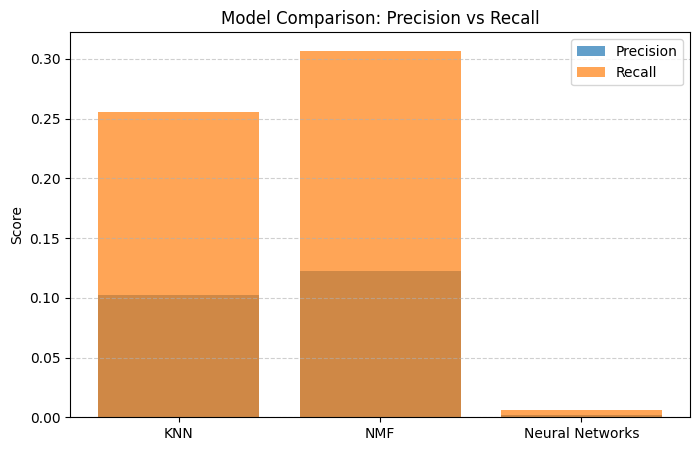

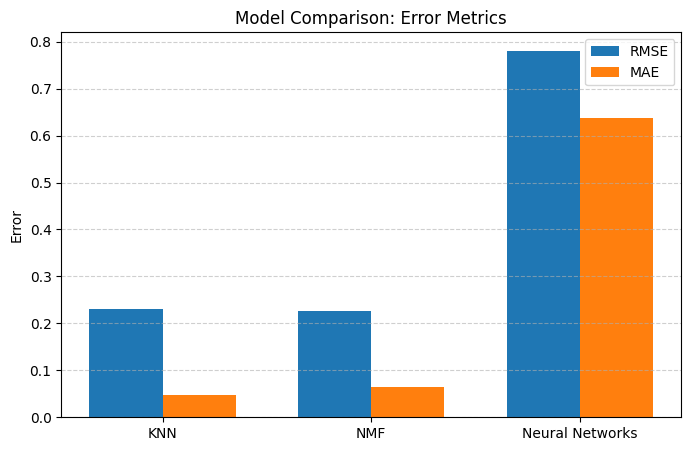

In [114]:
import matplotlib.pyplot as plt
import pandas as pd

# --- Create DataFrame from results list ---
results_df = pd.DataFrame(results)

# --- Plot Precision & Recall ---
plt.figure(figsize=(8,5))
plt.bar(results_df['Model'], results_df['Precision'], label='Precision', alpha=0.7)
plt.bar(results_df['Model'], results_df['Recall'], label='Recall', alpha=0.7, bottom=results_df['Precision']*0)  # overlay style
plt.title("Model Comparison: Precision vs Recall")
plt.ylabel("Score")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

# --- Plot RMSE & MAE ---
plt.figure(figsize=(8,5))
width = 0.35
x = range(len(results_df))
plt.bar([i - width/2 for i in x], results_df['Root Mean Squared Error'], width=width, label='RMSE')
plt.bar([i + width/2 for i in x], results_df['Mean Absolute Error'], width=width, label='MAE')
plt.xticks(x, results_df['Model'])
plt.title("Model Comparison: Error Metrics")
plt.ylabel("Error")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

In [112]:
def hybrid_recommend(user_label, k=10, weights=(0.4, 0.4, 0.2)):
    """
    Hybrid recommender combining KNN, NMF, and Neural Network predictions.

    Args:
        user_label (str): User identifier (e.g., "User_5").
        k (int): Number of top recommendations to return.
        weights (tuple): Weights for (KNN, NMF, NN).

    Returns:
        pd.Series: Top-k recommended items with hybrid scores.
    """
    w_knn, w_nmf, w_nn = weights

    # --- Get predictions from each model ---
    preds_knn = knn_predict_fn(user_label)     # full vector
    preds_nmf = nmf_pred_fn(user_label,k)        # full vector
    preds_nn  = nn_predict_fn(user_label,k)      # full vector (already 3–5)

    # Convert to numpy arrays
    preds_knn = np.array(preds_knn).astype(float).flatten()
    preds_nmf = np.array(preds_nmf).astype(float).flatten()
    preds_nn  = np.array(preds_nn).astype(float).flatten()

    # --- Weighted average ---
    hybrid_preds = w_knn * preds_knn + w_nmf * preds_nmf + w_nn * preds_nn

    # Mask already rated items
    user_idx = list(user_course_matrix.index).index(user_label)
    rated_mask = user_course_matrix.iloc[user_idx].values > 0
    hybrid_preds[rated_mask] = -np.inf

    # --- Top-k items ---
    top_items = np.argsort(hybrid_preds)[-k:][::-1]
    top_scores = hybrid_preds[top_items]

    return pd.Series(top_scores, index=user_course_matrix.columns[top_items])


In [113]:
print(hybrid_recommend('User_11',k=10,weights=(0.6, 0.5, 1.5)))

 1/28 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step

C:\Users\mssan\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
course_title
Photography Basics and Beyond: From Smartphone to DSLR     7.606544
Data Science: Foundations using R                          7.321654
Sexualidad...mucho más que sexo                            7.182467
Java Programming and Software Engineering Fundamentals     7.175876
Étudier en France: French Intermediate course B1-B2        7.070536
Weight Management: Beyond Balancing Calories               7.068324
R Programming                                              7.015685
The Singer Songwriter                                      6.920687
IBM AI Engineering                                         6.813180
Project Management & Other Tools for Career Development    6.809902
dtype: float64


In [ ]:
def predict(model_name, params):
    if model_name == "KNN":
        return knn_predict_fn(user_id, params['top_courses'])
    elif model_name == "NMF":
        return nmf_predict_fn(user_id, params['top_courses'])
    elif model_name == "Neural Network":
        return nn_predict_fn(user_id, params['top_courses'])
    elif model_name == "Hybrid":
        return hybrid_recommend(user_id, params['top_courses'], weights=(0.6,0.35,0.05))

In [160]:
def avg_new_recommendations_per_user(model_fn, train_df, test_df, k=10):
    new_counts = []
    n_courses = test_df.shape[1]

    for user in test_df.index:
        # Courses user already interacted with (non-zero in train)
        seen_courses = set(train_df.columns[train_df.loc[user] > 0])

        # Model prediction
        y_pred = model_fn(user)
        if isinstance(y_pred, tuple):
            y_pred = y_pred[0]

        # Convert to NumPy, ensure numeric, clip to available size
        y_pred = np.array(y_pred, dtype=float).flatten()[:n_courses]

        # Get top-k indices safely
        top_k_idx = np.argsort(y_pred)[-k:]
        top_k_idx = [i for i in top_k_idx if i < n_courses]  # ✅ Prevent out-of-range indices

        # Map to actual course names
        recommended_courses = set(test_df.columns[top_k_idx])

        # Unseen = recommended - already seen
        unseen = recommended_courses - seen_courses
        new_counts.append(len(unseen))

    return np.mean(new_counts)


In [162]:
avg_knn = avg_new_recommendations_per_user(knn_predict_fn,X_train, X_test)
avg_nmf = avg_new_recommendations_per_user(nmf_pred_fn, X_train, X_test, k=5)
avg_nn  = avg_new_recommendations_per_user(nn_pred_fn, X_train, X_test, k=5)
avg_hybrid = avg_new_recommendations_per_user(hybrid_fn, X_train, X_test, k=5)

results_new = pd.DataFrame({
    'Model': ['KNN', 'NMF', 'Neural Network', 'Hybrid'],
    'Avg New/Unseen Courses per User': [avg_knn, avg_nmf, avg_nn, avg_hybrid]
})

display(results_new)

C:\Users\mssan\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
C:\Users\mssan\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
C:\Users\mssan\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
C:\Users\mssan\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
C:\Users\mssan\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py

TypeError: nmf_pred_fn() missing 1 required positional argument: 'top_n'

In [ ]:
#from backend import knn_predict_fn, nmf_predict_fn, nn_predict_fn, hybrid_recommend

In [ ]:
import pickle

with open(r"C:\Users\mssan\OneDrive\Desktop\app_recommendation\user_course_matrix.pkl", "wb") as f:
    pickle.dump(user_course_matrix, f)

In [ ]:

# Save NN model
nn_model.save("nn_model.h5")

# Save NMF predictions
with open("nmf_pred.pkl", "wb") as f:
    pickle.dump(nmf_pred, f)

In [ ]:
with open(r"C:\Users\mssan\OneDrive\Desktop\app_recommendation\weighted_features.pkl", "wb") as f:
    pickle.dump(weighted_features, f)

In [ ]:
with open(r"C:\Users\mssan\OneDrive\Desktop\app_recommendation\df.pkl", "wb") as f:
    pickle.dump(df, f)